# Example `KBackground.Estimator` workflow with K2 Campaign 8

In this notebook we show how to use the `KBackground` tool to estimate rolling band. You can see a video of the rolling band in this dataset [here](https://www.youtube.com/watch?v=cAc70ErIsSQ).

In [99]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from kbackground import Estimator
from astropy.io import fits
from astropy.table import Table

First we are going to get a number of the TPFs in a large superstamp in campaign 8. This will let us see a patch of data with a rolling band.

In [75]:
tpfs = []
for idx in np.arange(656, 656 + 26):
    tpfs.append(lk.search_targetpixelfile(f"EPIC 200068{idx}", mission='k2').download())

Next we will extract the row, column and flux values from all the TPFs.

In [76]:
rows, columns, fluxs, cadencenos = [], [], [], []
for tpf in tpfs:
    column, row = np.meshgrid(np.arange(tpf.column, tpf.shape[2] + tpf.column), np.arange(tpf.row, tpf.shape[1] + tpf.row))
    aper = np.ones(tpf.shape[1:], bool)
    rows.append(row[aper])
    columns.append(column[aper])
    fluxs.append(tpf.flux.value[:, aper])
    cadencenos.append(tpf.cadenceno)

Next we can build the `Estimator` object, passing in the row, column, and flux values from all the TPFs.

In [77]:
e = Estimator(np.hstack(rows), np.hstack(columns), np.hstack(fluxs))

Under the hood, `KBackground` works on the median subtracted frames, below we plot a median subtracted frame which shows a rolling band.

Text(0, 0.5, 'Row')

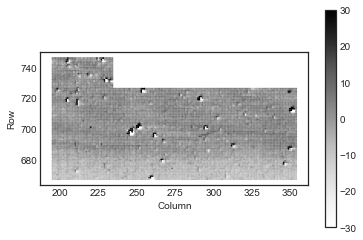

In [100]:
plt.scatter(np.hstack(columns), np.hstack(rows), s=1, c=e.flux[870] - np.median(e.flux, axis=0)[None, :], vmin=-30, vmax=30)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel('Column')
plt.ylabel('Row')

We can access the model for any frame using

In [101]:
e.model(870)

array([[-8.02538704, -8.00339084, -7.98191995, ...,  2.49557396,
         2.49400784,  2.49331736]])

Or a subset using

In [102]:
e.model([40, 45, 60])

array([[1.81215392, 1.74275276, 1.67630386, ..., 3.5436077 , 3.60230414,
        3.66017659],
       [2.02753233, 1.97581341, 1.92617351, ..., 1.80372056, 1.89094986,
        1.98130831],
       [1.45133761, 1.42319312, 1.39664867, ..., 2.39844703, 2.39315712,
        2.38584031]])

Or all the frames

In [103]:
e.model()

array([[2.42208442, 2.36539736, 2.31095732, ..., 2.60675336, 2.66711768,
        2.72938336],
       [2.26812335, 2.22250916, 2.17883727, ..., 2.56259745, 2.63001031,
        2.69967043],
       [2.00194614, 1.97479783, 1.94909538, ..., 2.45779461, 2.53493122,
        2.61479985],
       ...,
       [2.6534387 , 2.61440466, 2.57770072, ..., 4.4852597 , 4.45918666,
        4.43114311],
       [2.44280836, 2.42933675, 2.41732856, ..., 4.70419885, 4.67449114,
        4.64244305],
       [2.32462393, 2.32542577, 2.32720532, ..., 4.85049747, 4.82034965,
        4.78768484]])

We can plot the model for the same frame above.

[Text(0.5, 1.0, 'Model'), Text(0.5, 0, 'Column'), Text(0, 0.5, 'Row')]

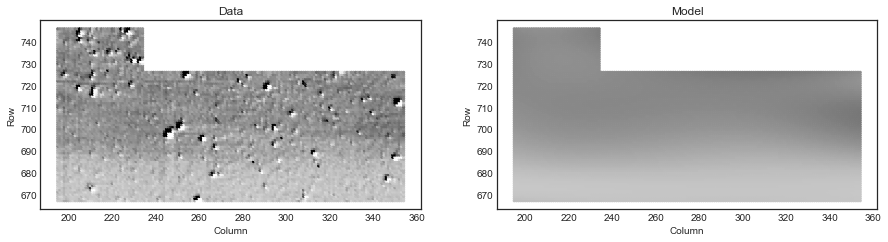

In [104]:
tdx = 890
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].scatter(np.hstack(columns), np.hstack(rows), s=5, c=e.flux[tdx] - np.median(e.flux, axis=0)[None, :], vmin=-30, vmax=30)
ax[0].set_aspect('equal')
ax[0].set(title='Data', xlabel='Column', ylabel='Row')
ax[1].scatter(np.hstack(columns), np.hstack(rows), s=5, c=e.model(tdx), vmin=-30, vmax=30)
ax[1].set_aspect('equal')
ax[1].set(title='Model', xlabel='Column', ylabel='Row')

Text(0, 0.5, 'Flux [counts]')

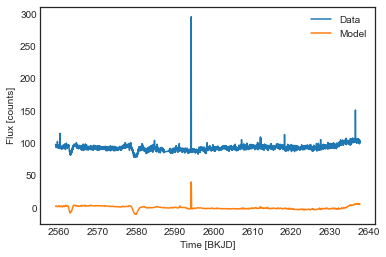

In [105]:
plt.plot(tpf.time.value, e.flux[:, 5060], label='Data')
plt.plot(tpf.time.value, e.model()[:, 5060], label='Model')
plt.legend()
plt.xlabel('Time [BKJD]')
plt.ylabel('Flux [counts]')